In [20]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import stats
import astropy.units as u
import astropy.constants as c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from preprocessing.limit_estimates import *

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [21]:
mass_s, inj_s, sigma_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits.txt", unpack=True)
mass2_s, inj2_s, sigma2_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits_tmp.txt", unpack=True)

[(1e-18, 1000.0), (10000000000000.0, 2e+18)]

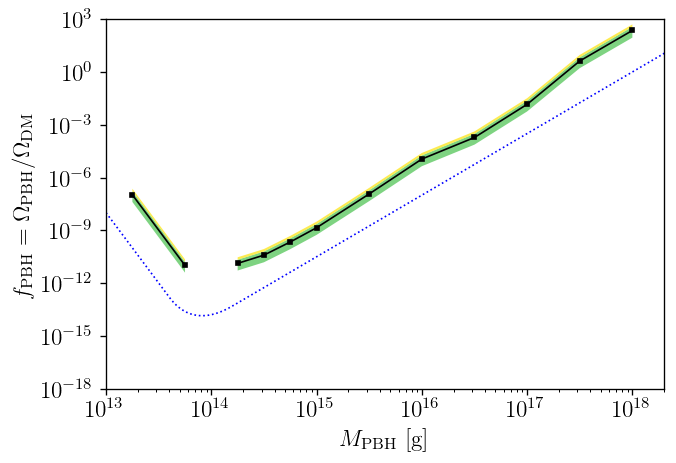

In [30]:
extras = False

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# our limits
one_sigma = inj_s * sigma_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

# our limits
one_sigma = inj2_s * sigma2_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass2_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass2_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass2_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

m_s = np.geomspace(1e13, 1e19, 1000)
ax.plot(m_s, pbh_f(m_s), 'b:', lw=1)

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}=\Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$')
ax.set(ylim=(1e-18, 1e3), xlim=(1e13, 2e18))

In [4]:
from preprocessing.limit_estimates import pbh_f_est

In [5]:
pbh_f_est(10**13.25)

9.30572040929699e-10

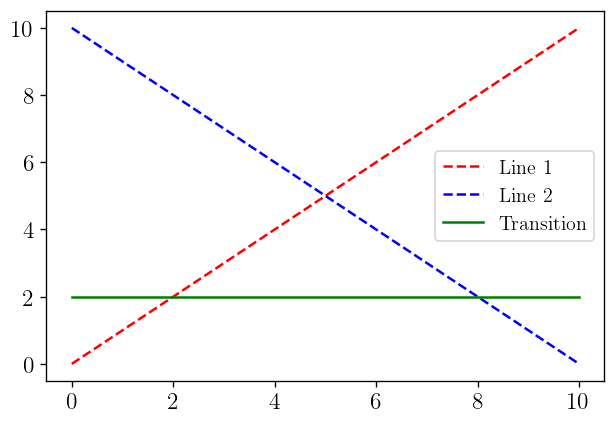

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the lines
def line1(x): return m1 * x + b1
def line2(x): return m2 * x + b2

# Example lines and transition points
m1, b1 = 1, 0  # y = x
m2, b2 = -1, 10  # y = -x + 10
a, b = 2, 8  # Transition region from x=2 to x=8

# Points for interpolation (at least 2 points per segment)
x_points = np.array([a, b])
y_points = np.array([line1(a), line2(b)])

# Additional points can be added to control the transition more finely
# For a simple case, we're using the endpoints of the transition region

# Cubic spline interpolation
cs = CubicSpline(x_points, y_points, bc_type='natural')

# Plotting
x_range = np.linspace(0, 10, 100)
plt.plot(x_range, line1(x_range), 'r--', label='Line 1')
plt.plot(x_range, line2(x_range), 'b--', label='Line 2')
plt.plot(x_range, cs(x_range), 'g', label='Transition')

plt.legend()
plt.show()
